# Project Details

#### Description

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary


Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone

Question

Q1-Import data into Python environment.
Q2-Provide the trend chart for the number of complaints at monthly and daily granularity levels.
Q3-Provide a table with the frequency of complaint types.
           Q3.1-Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
Q4-Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
Q5-Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
           Q5.1-Which state has the maximum complaints
           Q5.2-Which state has the highest percentage of unresolved complaints
Q6-Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [1]:
# load important libraries
import numpy as np
import pandas as pd

#### Q1-Import data into Python Environment

In [2]:
telecom_data=pd.read_csv("D:/1.PG & Master/1.Data Science/2.Data Science With Python/Project/Project-2/Comcast_telecom_complaints_data.csv")

In [3]:
telecom_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [4]:
telecom_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
# Check and findout data types in columns
telecom_data.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
# To check columns names
telecom_data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [7]:
# (2224, 11) Means 2224 Row, 11 Column
telecom_data.shape

(2224, 11)

In [8]:
# No Missing value found in this dataset
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [9]:
# Note: Describe() only work numerical data, This function helps to findout outlier in columns (Numeric Columns)
telecom_data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [10]:
# Note : There is no missing value in dataset
telecom_data.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

#### Q2-Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [11]:
# Adding a new variable in existing dataset, Because i want to find out the month wise complaints
telecom_data["data_time"]=telecom_data["Date_month_year"] + " " + telecom_data["Time"]

In [12]:
telecom_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,data_time
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,04-Feb-15 9:13:18 AM
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,06-Feb-15 1:24:39 PM
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,06-Sep-15 5:28:41 PM
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,23-Jun-15 11:13:30 PM


In [13]:
# Now convert from data_time and Date_month_year to Date Time Format
telecom_data["data_time"]=pd.to_datetime(telecom_data["data_time"])

In [14]:
# Now convert from data_time and Date_month_year to Date Time Format
telecom_data["data_time"]=pd.to_datetime(telecom_data["data_time"])
telecom_data["Date_month_year"]=pd.to_datetime(telecom_data["Date_month_year"])
telecom_data_monthly=telecom_data.set_index(telecom_data["data_time"])

In [15]:
# Visualization librabry import
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='data_time', ylabel='Number of Complaints'>

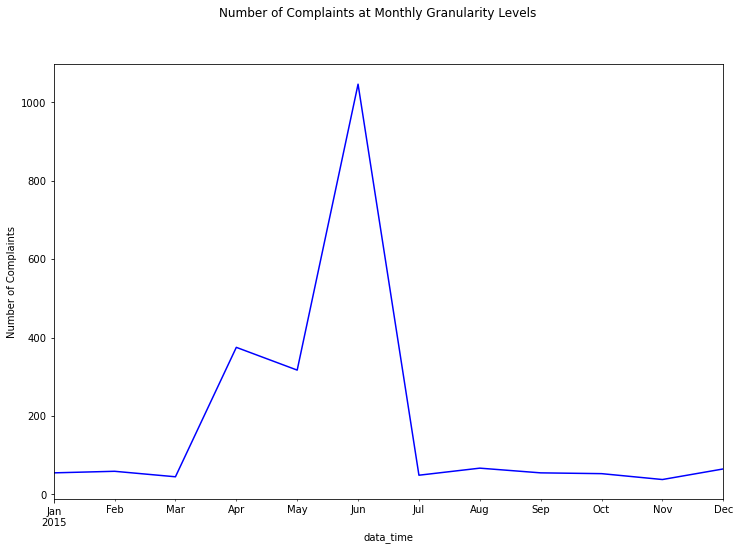

In [16]:
# Provide the trend chart for the number of complaints at monthly granularity levels.
plt.figure(figsize=(12,8))
plt.suptitle('Number of Complaints at Monthly Granularity Levels')
plt.ylabel('Number of Complaints')
telecom_data_monthly.groupby(pd.Grouper(freq="M")).size().plot(color='blue')

<AxesSubplot:xlabel='Day of Month', ylabel='Number of Complaints'>

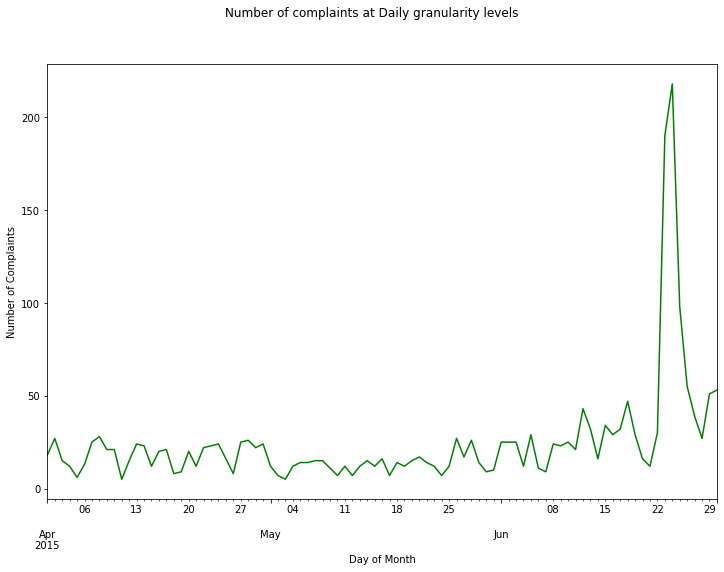

In [17]:
# Provide the trend chart for the number of complaints at daily granularity levels.
telecom_data['Day of Month'] = pd.to_datetime(telecom_data['Date'])
telecom_data_daily = telecom_data.set_index(telecom_data["Day of Month"])
#Increase Graph Size
plt.figure(figsize=(12,8))
plt.suptitle('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
telecom_data_daily.groupby(pd.Grouper(freq="D")).size().plot(color='green')

#### Q3-Provide a table with the frequency of complaint types.

In [18]:
# To get the frequency of complaint types first we have to see all complaint types and check for duplicate, case sensentive
# Incomplete data so that we can make analytics better
telecom_data_frequency=telecom_data["Customer Complaint"].value_counts()

In [19]:
telecom_data_frequency

Comcast                          83
Comcast Internet                 18
Comcast Data Cap                 17
comcast                          13
Comcast Billing                  11
                                 ..
Comcast Termination Fee           1
Inaccurate billing                1
Internet connectivity issues      1
Comcast becoming a hassle         1
Stop the data caps of Comcast     1
Name: Customer Complaint, Length: 1841, dtype: int64

In [20]:
telecom_data_frequency.head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Comcast Data Caps           11
Data Caps                   11
Unfair Billing Practices     9
Comcast data caps            8
Data Cap                     8
Name: Customer Complaint, dtype: int64

In [21]:
# Better to convert all data into uper case or sentence case so duplicate value will shorted
telecom_data_frequency=telecom_data["Customer Complaint"].str.upper().value_counts()

#### Q3.1-Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [22]:
telecom_data_frequency.head(50)
# COMCAST, COMCAST DATA CAP, COMCAST INTERNET are the Highest top 3 complaint types

COMCAST                               102
COMCAST DATA CAP                       30
COMCAST INTERNET                       29
COMCAST DATA CAPS                      21
COMCAST BILLING                        18
COMCAST SERVICE                        15
INTERNET SPEED                         15
UNFAIR BILLING PRACTICES               13
DATA CAPS                              13
DATA CAP                               12
COMCAST COMPLAINT                      11
COMCAST/XFINITY                        11
COMCAST INTERNET SERVICE               10
BILLING                                 9
BILLING ISSUES                          8
COMCAST ISSUES                          5
SLOW INTERNET                           5
COMCAST CABLE                           5
COMCAST BILLING COMPLAINT               5
SERVICE ISSUES                          5
INTERNET                                5
COMPLAINT AGAINST COMCAST               5
COMCAST BILLING PRACTICES               5
INTERNET SERVICE                  

#### Q4-Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [23]:
# Check how many unique values are under Status Column 
telecom_data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [24]:
# Convert as per Instruction (Task 4) into New Column without changing the main data so that we can use the main data
# in Future
telecom_data['O_P_Status']= ["Open" if Status=="Open" or Status=="Pending" else 
                                      "Closed" for Status in telecom_data["Status"]]

In [25]:
telecom_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,data_time,Day of Month,O_P_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,2015-04-02,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,2015-06-02,Closed
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,2015-06-09,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-06-23 23:13:30,2015-06-23,Closed


In [26]:
# Check whether all status updated or not
telecom_data['O_P_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [27]:
telecom_data_state_status = pd.crosstab(telecom_data["State"],telecom_data ["O_P_Status"])

In [28]:
telecom_data_state_status

O_P_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


#### Q5-Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

#### Q5.1-Which state has the maximum complaints

<AxesSubplot:title={'center':'State Wise Status of Complaints'}, xlabel='State'>

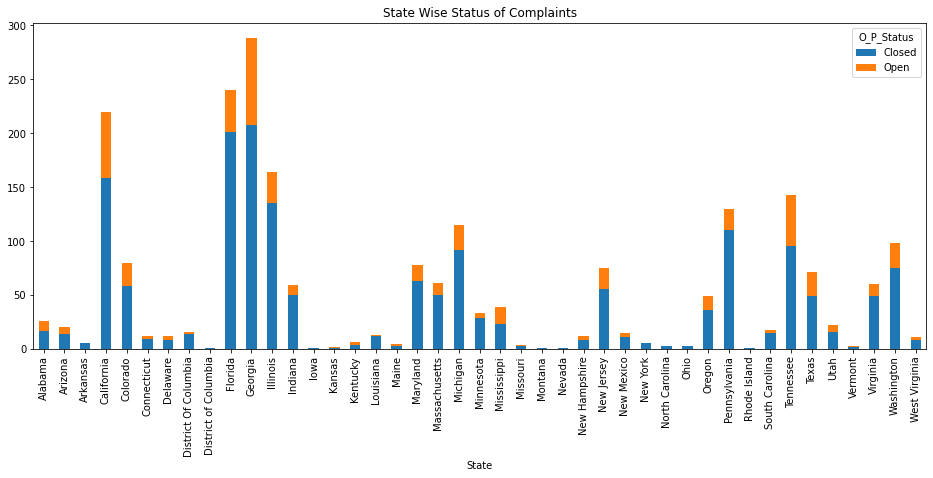

In [29]:
pd.crosstab(telecom_data.State,telecom_data.O_P_Status).plot(kind='bar',figsize=(16,6),
                                                      stacked=True,
                                                      title='State Wise Status of Complaints')

In [30]:
#Georgia has maximum number of complaints

#### Q5.2-Which state has the highest percentage of unresolved complaints

In [31]:
telecom_data_unresolved_complaints = telecom_data[telecom_data['O_P_Status']=='Open']

In [32]:
telecom_data_unresolved_complaints

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,data_time,Day of Month,O_P_Status
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,2015-06-24,Open
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28 18:46:31,2015-06-28,Open
12,339282,Comcast Violating Open Internet Rules by Block...,13-06-15,2015-06-13,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,2015-06-13 16:03:18,2015-06-13,Open
15,370137,Internet complaint,27-06-15,2015-06-27,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,2015-06-27 15:25:03,2015-06-27,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,339481,Terrible internet service from Comcast,13-06-15,2015-06-13,7:14:02 PM,Customer Care Call,Woodbridge,Virginia,22191,Open,No,2015-06-13 19:14:02,2015-06-13,Open
2202,305166,comcst data cap,24-05-15,2015-05-24,12:34:08 AM,Customer Care Call,Woodstock,Georgia,30188,Open,Yes,2015-05-24 00:34:08,2015-05-24,Open
2208,374570,comcast cap,30-06-15,2015-06-30,12:42:45 PM,Customer Care Call,Woodstock,Georgia,30188,Pending,No,2015-06-30 12:42:45,2015-06-30,Open
2218,338192,"Speed throttling, speeds not at promised output",06-12-15,2015-12-06,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,2015-12-06 18:35:59,2015-06-12,Open


In [33]:
telecom_data_unresolved_complaints_count = telecom_data_unresolved_complaints.State.value_counts()
telecom_data_unresolved_complaints_count

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Washington              23
Michigan                23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Virginia                11
Massachusetts           11
Indiana                  9
Alabama                  9
Utah                     6
Arizona                  6
New Mexico               4
Delaware                 4
Minnesota                4
New Hampshire            4
Connecticut              3
Kentucky                 3
South Carolina           3
West Virginia            3
Maine                    2
District Of Columbia     2
Louisiana                1
Kansas                   1
Missouri                 1
Vermont                  1
Name: State, dtype: int64

Text(0.5, 1.0, 'Highest percentage of Unresolved Complaints\n')

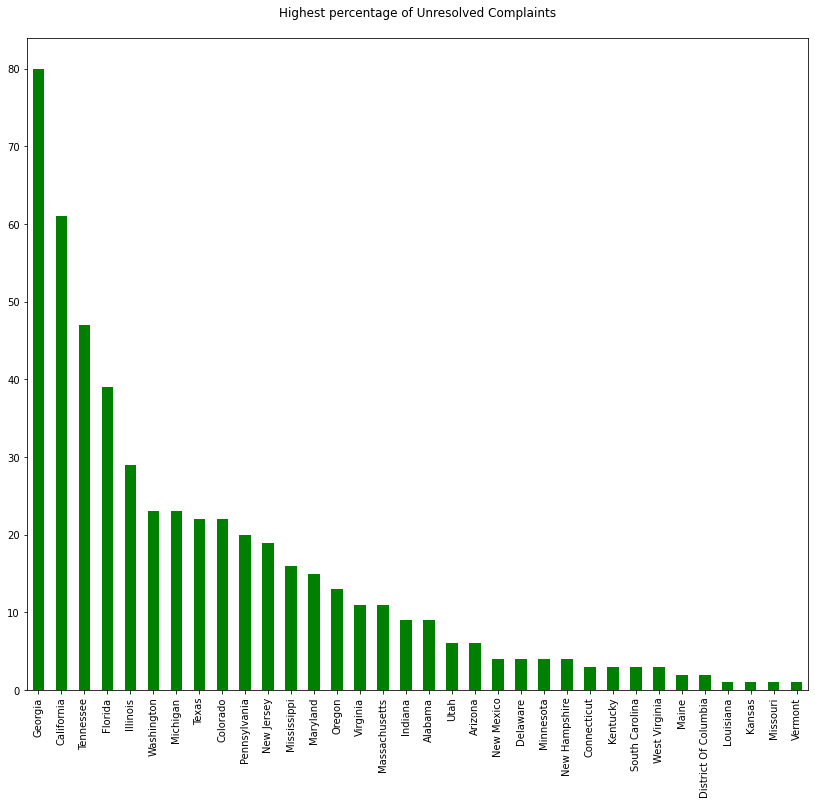

In [34]:
# Georgia has the Highest Number of unresolved complaints
# Show this by Bar Graph
telecom_data_unresolved_complaints_count.plot(kind='bar',figsize=(14,12),color="green")
plt.title('Highest percentage of Unresolved Complaints\n')

#### Q6-Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [35]:
# Check unique values in Received Via Column
telecom_data['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [36]:
# So there are only two values in that columns so no need to short we can directly proceed to task 6

In [37]:
telecom_data["O_P_Status"].value_counts()

Closed    1707
Open       517
Name: O_P_Status, dtype: int64

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='O_P_Status'>

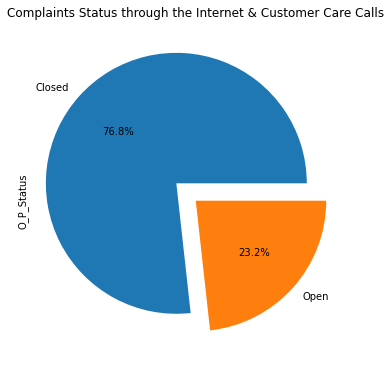

In [38]:
# Used autopct='%1.1f%%'  to show percentage under the pie chart
myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
telecom_data["O_P_Status"].value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',
                        figsize = (14,6))

### Summary of this project

In [40]:
# Important Library Used
# Numpy- For Array and Mathematically Calculation
# Pandas- For EDA
# Seaborn- For Vsualization